# Activité numérique n° 1 (MPI) : résolution de l'équation de Laplace


L’exercice consiste à résoudre l’équation de Laplace de l’électrostatique à deux dimensions :
$$\Delta {\cal V}=\left(\frac{\partial ^2{\cal V}}{\partial x^2}\right)+\left(\frac{\partial^2 {\cal V}}{\partial y^2}\right)=0\ .$$
Il est ensuite possible de faire tracer les lignes de champ électrostatique.

## I - Principe de la résolution 

Il est impossible de résoudre numériquement l’équation de Laplace en tout point d’un plan complet. On se restreint alors à un domaine fini, une surface de forme rectangulaire, discrétisée à l’aide d’une grille $N_x \times  N_y$ de points de coordonnées ($x_i$, $y_j$) régulièrement espacés :
$$\left\{\begin{array}{l}
x_i = i \times a\\
y_j = j \times a\\
\end{array}\right.\ ,$$
où le pas de la grille est pris égal à $a = 10^{-6}$ m.

On peut alors montrer que l’équation de Laplace admet une solution continue unique dans un domaine fermé si le potentiel est imposé sur le bord du domaine, c’est-à-dire le contour de la grille ainsi que d’éventuels autres points sur la grille (représentant par exemple les armatures d’un condensateur).

L’algorithme, analogue à la méthode d’Euler, repose sur le fait que si l’équation de Laplace est vérifiée alors le potentiel en un point M de la grille est égal à la moyenne du potentiel des quatre points plus proches voisins de M. La nouveauté par rapport à la méthode d’Euler est la résolution itérative : partant d’une condition initiale arbitraire (valeur du potentiel fixées arbitrairement en tout point de la grille), on améliore par récurrence la précision du résultat pour qu’il 
converge vers la solution de l’équation de Laplace.

Dans cet exercice, on sera ammener à considérer trois situations physiques :

* dans la situation S1, un bord de la grille est au potentiel 10 V, les autres au potentiel nul ;
* la situation S2 illustre le phénomène du pouvoir des pointes. Elle est dérivée de S1 en ajoutent un segment au potentiel 10 V (reliant le centre de la grille au milieu du bord de la grille porté au potentiel 10 V) ;
* la situation S3 illustre le cas du condensateur plan : deux segments parallèles, face à face, au potentiels respectifs 10 et -10 V, le bord de la grille étant mis au potentiel nul.

La figure illustre les conditions aux limites dans chacune des situations physiques étudiées :
* potentiel nul en noir, 
* +10 V en rouge, 
* -10 V en bleu.

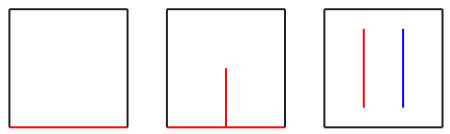
<p style="text-align: center;">Figure n°1 : Conditions aux limites étudiées</p>

## 2 - Travail demandé 

On commence par traiter la situation S1.

1. Importer les bibliothèques numpy et matplotlib en exécutant la première cellule. 

In [19]:
#%%  question 1 : importations

import numpy as np
import matplotlib.pyplot as plt


Dans la cellule suivante, les différents paramètres sont initialisés : les tailles $N_x$ et $N_y$, puis le pas $a$ de la grille.

La situation testée (S1, S2 ou S3) est précisée par un entier $S$ qui prendra les valeurs respectives 1, 2 ou 3. 
On commence donc avec $S=1$. 

Les valeurs du potentiel sont stockées dans un tableau numpy $V[i,j]$ et doivent être initialisées à la valeur 0. 

Enfin, rappelons que l’on appelle ici « bord du domaine de résolution » l’ensemble des points où la valeur du potentiel est imposée. Pour que la méthode utilisée s’applique, le bord doit nécessairement inclure le contour géométrique de la grille mais intègre aussi d’autres points intérieurs. Ces points à l’intérieur de la grille et appartenant au bord du domaine sont stockés sous forme d’un tableau
de booléens $CL$, de même taille que $V$ :
* si le point ($i$, $j$) appartient au bord, alors $CL[i,j$] vaut True : le potentiel en ce point est imposé, sa valeur ne doit jamais être modifiée ;
* si le point ($i$, $j$) n’appartient pas au bord, alors $CL[i,j]$ vaut False : le potentiel en ce point est inconnu a priori. 

2. Initialiser $a$ et $S$.

In [72]:
#%%  question 2 : définition de la grille

Nx=151      #définition de la taille et du pas de la grille
Ny=151      
a=1e-6    

S=3

V=np.zeros((Nx,Ny))  # initialisation du potentiel  
CL=np.empty((Nx,Ny), dtype=bool) 
CL[:,:]=False        # initialisation du tableau CL     

3. Initialiser le tableau de booléens $CL$ à la valeur False, puis compléter la fonction $CL1()$ permettant de fixer les valeurs du potentiel et de $CL$ sur les bords de la grille exclusivement (figure n°1), et ce en fonction de la situation testée.

In [58]:
#%%  question 3 : conditions limites sur le bord de la grille

def CL1():
    for j in range(Ny):
        CL[Nx-1,j]=True   
        if S==1 or S==2:   # situation S1 ou S2 
            V[Nx-1,j]=10   
        CL[0,j]=True 
    for i in range(Nx):  
        CL[i,0]=True   
        CL[i,Ny-1]=True  

4. En fonction de la situation rencontrée, la fonction $CL2()$ fixe la valeur du potentiel $V[i,j]$ aux points ($i$, $j$) de l'intérieur de la grille où $CL[i,j$] vaut True. La laisser telle quelle.

In [59]:
#%%  question 4 : conditions limites à l'intérieur de la grille

def CL2():
    for i in range(int(Nx/2),Nx-1,1) :
        if S==2:         # situation S2 
            CL[i,int(Ny/2)]=True
            V[i,int(Ny/2)]=10
        if S==3:         # situation S3 
            V[int(Nx/4):int(3*Nx/4),int(8*Ny/20)]=10
            CL[int(Nx/4):int(3*Nx/4),int(8*Ny/20)]=True
            V[int(Nx/4):int(3*Nx/4),int(12*Ny/20)]=-10
            CL[int(Nx/4):int(3*Nx/4),int(12*Ny/20)]=True


L’algorithme de Jacobi permet une résolution itérative de l’équation de Laplace : la valeur du potentiel $V_{n+1}[i, j]$ au point ($i$, $j$) à l’itération $n + 1$ se déduit de la valeur des potentiels voisins à l’itération $n$ par :
$$V_{n+1}[i, j] = \frac{V_{n}[i − 1, j] + V_n [i, j − 1] + V_n [i +1, j] + V_n [i, j + 1]}{4}\ .$$
Ainsi, la valeur du potentiel en tout point est recalculée à chaque itération en fonction de ce qu’elle aurait dû être si l’itération précédente vérifiait l’équation de Laplace. La convergence de la méthode est démontrable mathématiquement : au bout d’un nombre suffisant d’itérations, on est assuré d’approcher de la solution exacte et les nouvelles itérations ne font presque plus évoluer le potentiel.
Le nombre d’itérations dépend de la précision souhaitée. Dans ce TP, on utilise un critère basé sur l’écart quadratique moyen :
$$e=\sqrt{\frac{\sum_{i,j}\left(V_{n+1}[i,j]-V_n[i,j]\right)^2}{N_xN_y}}\ ,$$
qui mesure l’évolution du potentiel entre deux itérations. On choisit de stopper la simulation lorsque $e$ devient inférieur à une valeur donnée $\epsilon$, compromis entre précision des résultats et temps de calcul.

5. Écrire une fonction ecart(V1,V2) prenant en argument deux tableaux Numpy de même taille et renvoyant l’écart $e$ entre ces deux tableaux.

In [60]:
#%%  question 5.

def ecart(V1,V2) :
    somme=0
    for i in range(1,Nx-1):
        for j in range(1,Ny-1):
             somme=somme+   (V1[i,j]-V2[i,j])**2
    return (somme/(Nx*Ny))**0.5

6. Ecrire une fonction IterationJacobi() qui effectue une itération de l’algorithme ci-dessus. Cette fonction ne prend aucun argument et doit renvoyer l’écart $e$ entre les potentiels avant et après itération.

On précise que pour effectuer une copie d’un tableau Numpy on utilise la syntaxe V_copie = V.copy(). Au contraire, l’instruction V_copie = V ne fait que donner deux noms au même tableau.

In [61]:
#%%  question 6

def IterationJacobi() :
    Vn=np.copy(V)
    for i in range(1,Nx-1):
        for j in range(1,Ny-1):
            if not(CL[i,j]) :
               V[i,j]=(Vn[i+1,j]+Vn[i-1,j]+Vn[i,j+1]+Vn[i,j-1])/4
    return ecart(V,Vn)

7. Ecrire une fonction Jacobi(eps) qui prend en argument un flottant $eps$ et qui itère l’algorithme tant que l’écart est supérieur à eps. À des fins de comparaison avec la méthode suivante, la fonction renverra le nombre d’itérations.

In [62]:
#%%  question 7
    
def Jacobi(eps):
    compteur=0
    e=1
    while e>eps : 
        e=IterationJacobi() 
        compteur=compteur+1
    return compteur

Les deux cellules suivantes comprennent les fonctions nécessaires aux calculs du champ électrique, puis au tracé des surfaces équipotentielles et des lignes de champ.

La fonction execution(eps) affiche les résultats obtenus. 

8. Tester le programme avec les valeurs 0,01, puis 0,003 de $eps$ (ne pas oublier de réinitialiser des tableaux en réexécutant la deuxième cellule). Commenter les résultats obtenus.

In [63]:
#%%  Reprise des fonctions du TD précédent sur le calcul du champs et l'affichage

def champE(V,i,j):
    Ex=(V[i,j]-V[i,j+1])/a
    Ey=(V[i,j]-V[i+1,j])/a
    return Ex,Ey


def calcul_champE(V):
    Ex=np.zeros((Nx,Ny))
    Ey=np.zeros((Nx,Ny))
    for i in range(Nx-1):
        for j in range(Ny-1):
            Ex[i,j],Ey[i,j]=champE(V,i,j)
    return Ex,Ey

In [73]:
#%%  Exécution

def execution(eps):
    CL1()
    CL2()
    print(Jacobi(eps))

    Ex,Ey=calcul_champE(V)

    import matplotlib
    matplotlib.rcParams['figure.figsize']=[9,9]

    Valeurs=np.linspace(np.min(V),np.max(V),21)
    plt.clf()
    plt.imshow(V)
    plt.contour(V,Valeurs,cmap='hot')
    plt.streamplot(np.linspace(0,Nx-1,Nx), np.linspace(0,Ny-1,Ny), Ex, Ey, color="red", linewidth=1, density=1)  
    plt.show()
    
execution(0.0003)    

1760


Pour accélérer les calculs, il faut utiliser les tableaux Numpy sans faire de boucles, en utilisant uniquement les fonctions du module. Par exemple :

* effectuer des opérations algébriques sur les tableaux, ce qui revient à les effectuer termes à termes ;
* la fonction np.sum(V) somme tous les éléments d’un tableau ;
* le « slicing » permet d’extraire des « sous-tableaux » : ainsi, si $V[i,j$] renvoie une seule valeur, $V[ :,j]$ renvoie la $j-1$ème colonne et $V[3 :7,j]$ un sous-ensemble de la $j-1$ème colonne (les élements sur les lignes numérotées de 3 à 6)

9. Réécrire les fonctions ecart et IterationJacobi en supprimant les boucles, puis tester le programme.

In [65]:
def ecart(V1,V2) :
    return (np.sum((V1-V2)**2)/(Nx*Ny))**(1/2)

def IterationJacobi() :
    Vn=np.copy(V)
    V[1:Nx-1,1:Ny-1]=(Vn[1:Nx-1,0:Ny-2]+Vn[1:Nx-1,2:Ny]+Vn[2:Nx,1:Ny-1]+Vn[0:Nx-2,1:Ny-1])/4
    CL2()   # Indispensable car l'instruction précédente modifie toutes les valeurs du potentiel à l'intérieur de la grille, y compris celles qui ne doivent pas être modifiées.
    return ecart2(V,Vn)

10. Tester la situation S2 et S3.